In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # label encoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Introduction
#Final Project_049_Khafid Rizki Pratama

Data yang digunakan merupakan data gelombang di perairan Makassar.
Data terdiri dari parameter wave height (m) dan period (s)
Time series data tersebut dimulai dari 1 maret 2019 dengan interval waktu 1 menit.

# Data Loading & Exploratory Data Analysis

In [2]:
df = pd.read_csv('C:/Users\ASUS/Downloads/Final_Assgn_049_002-main/Final_Assgn_049_002-main/wavebuoy.csv')
print ('Data read into a pandas dataframe!')
df

Data read into a pandas dataframe!


,Date / Time,Wave Height (m),period (s),Identity
0,01/03/2019 00:00,0.433304,3.724949,High
1,01/03/2019 00:01,0.442327,3.734511,High
2,01/03/2019 00:02,0.447635,3.739687,High
3,01/03/2019 00:03,0.451556,3.728244,High
4,01/03/2019 00:04,0.452980,3.774444,High
...,...,...,...,...
994,01/03/2019 16:34,0.476274,3.737861,High
995,01/03/2019 16:35,0.472920,3.784031,High
996,01/03/2019 16:36,0.484575,3.770960,High
997,01/03/2019 16:37,0.480892,3.757760,High


In [3]:
# Let's view the top 5 rows of the dataset using the head() function.
df.head()

,Date / Time,Wave Height (m),period (s),Identity
0,01/03/2019 00:00,0.433304,3.724949,High
1,01/03/2019 00:01,0.442327,3.734511,High
2,01/03/2019 00:02,0.447635,3.739687,High
3,01/03/2019 00:03,0.451556,3.728244,High
4,01/03/2019 00:04,0.452980,3.774444,High


In [4]:
# We can also veiw the bottom 5 rows of the dataset using the tail() function.
df.tail()

,Date / Time,Wave Height (m),period (s),Identity
994,01/03/2019 16:34,0.476274,3.737861,High
995,01/03/2019 16:35,0.472920,3.784031,High
996,01/03/2019 16:36,0.484575,3.770960,High
997,01/03/2019 16:37,0.480892,3.757760,High
998,01/03/2019 16:38,0.484689,3.815854,High


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date / Time      999 non-null    object 
 1   Wave Height (m)  999 non-null    float64
 2   period (s)       999 non-null    float64
 3   Identity         999 non-null    object 
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [6]:
df.shape

(999, 4)

In [7]:
# Summary untuk jenis kategori
for i in df[['Identity']]:
    print(df[i].value_counts(),'\n')

High    831
Low     168
Name: Identity, dtype: int64 



In [8]:
# summary data numeric
df.describe()

,Wave Height (m),period (s)
count,999.000000,999.000000
mean,80.526025,83.814347
std,891.600900,891.305306
min,0.394261,3.558987
25%,0.439108,3.720412
50%,0.463290,3.772529
75%,0.476863,3.830459
max,9999.000000,9999.000000


In [9]:
# check missing data
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


Text(0.5, 1.0, 'Wave Height (m) Conditions')

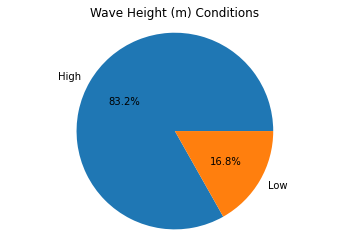

In [11]:
# persentase kondisi tinggi gelombang
df_wave = df['Identity'].value_counts()
df_wave.plot(kind='pie',autopct='%1.1f%%',labels=df_wave.index)
plt.axis('equal')
plt.ylabel('')
plt.title('Wave Height (m) Conditions')

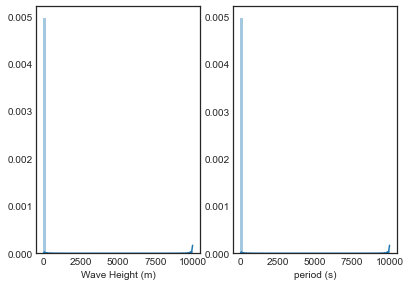

In [12]:
# distribusi 
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(df['Wave Height (m)'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['period (s)'].dropna())
fig = plt.gcf()
fig.set_size_inches(10,10)


# Data Pre-processing

In [13]:
# remove NaN
df = df.dropna()

In [15]:
# mengubah data kategori menjadi numerik
# creating labelEncoder
le = preprocessing.LabelEncoder()

# convert text to numerical category
df[['Identity']] = df[['Identity']].apply(le.fit_transform)

In [16]:
df.head()

,Date / Time,Wave Height (m),period (s),Identity
0,01/03/2019 00:00,0.433304,3.724949,0
1,01/03/2019 00:01,0.442327,3.734511,0
2,01/03/2019 00:02,0.447635,3.739687,0
3,01/03/2019 00:03,0.451556,3.728244,0
4,01/03/2019 00:04,0.452980,3.774444,0


# Definisi Model
Parameter yang digunakan sebagai features dalam kasus ini yaitu: wave height (m), period (s). <br>
Parameter yang digunakan sebagai target yaitu Identity.

In [17]:
data_features = df[['Wave Height (m)', 'period (s)']]
data_target   = df[['Identity']]

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.3, random_state=0) # 70% training and 30% test
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print('dimensi feature total: ', data_features.shape)
print('dimensi feature train: ', x_train.shape)
print('dimensi feature test: ', x_test.shape)
print('dimensi target test: ', y_test.shape)

# standarisasi data training
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

dimensi feature total:  (999, 2)
dimensi feature train:  (699, 2)
dimensi feature test:  (300, 2)
dimensi target test:  (300,)


# Training

# Logistic Regression

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
nilai akurasi pembuatan model dengan data training adalah 0.8297567954220315
nilai akurasi pembuatan model dengan data testing adalah 0.8366666666666667


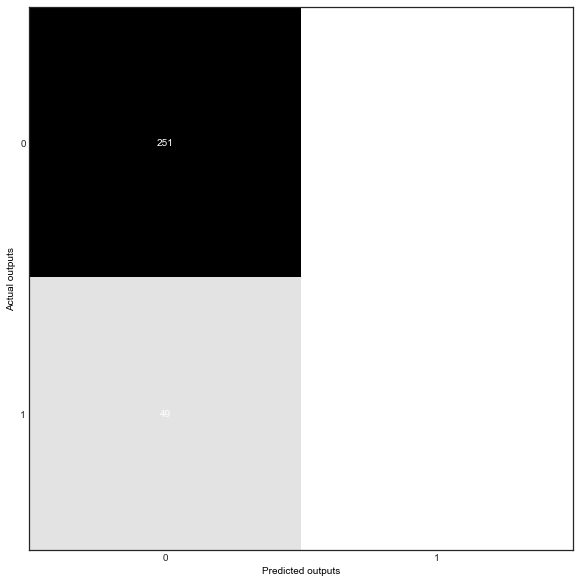

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       251
           1       0.00      0.00      0.00        49

    accuracy                           0.84       300
   macro avg       0.42      0.50      0.46       300
weighted avg       0.70      0.84      0.76       300



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# create model
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

# Testing the dataset
x_test = scaler.transform(x_test)

# prediksi output
y_pred = model.predict(x_test)
print(y_pred)
print('nilai akurasi pembuatan model dengan data training adalah', model.score(x_train, y_train))
print('nilai akurasi pembuatan model dengan data testing adalah', model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# summary model
print(classification_report(y_test, y_pred))

# K-Nearest Neighbor (KNN)

In [19]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

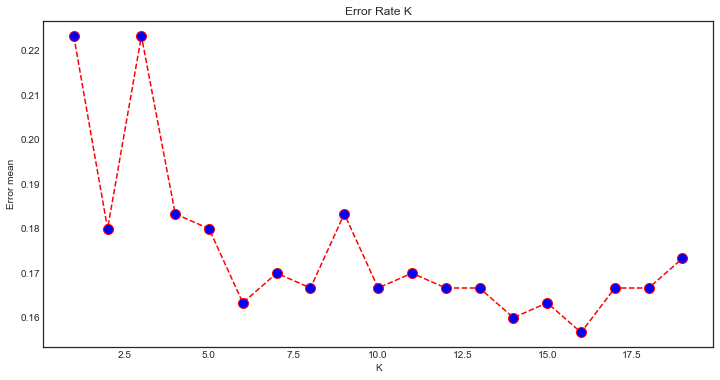

In [20]:
# plotting error rate of K-Means
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [21]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=16)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred1 = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8433333333333334


# Naive Bayes Classifier

In [22]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred2 = gnb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.17333333333333334


# Decision Tree Classifier

In [23]:
feature_cols = list(df[df.columns[1:-1]])

# Create Decision Tree classifer object
d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
d_tree = d_tree.fit(x_train,y_train)

# Predict the response for test dataset
y_pred3 = d_tree.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8366666666666667


# Random Forest

No handles with labels found to put in legend.


Accuracy: 0.8033333333333333


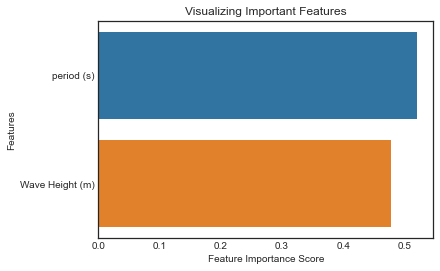

In [24]:
# Create a Gaussian Classifier
forest = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
forest.fit(x_train,y_train) 

y_pred4 = forest.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

# Finding Important Features
feature_imp = pd.Series(forest.feature_importances_,index=feature_cols).sort_values(ascending=False) 

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Support Vector Machines

In [25]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(x_train, y_train) 

# Predict the response for test dataset
y_pred5 = svm_model.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.8366666666666667


# Model Evaluation

In [26]:
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("KNN:", accuracy_score(y_test, y_pred1))
print("Naive Bayes:", accuracy_score(y_test, y_pred2))
print("Decision Tree:", accuracy_score(y_test, y_pred3))
print("Random Forest:", accuracy_score(y_test, y_pred4))
print("SVM:", accuracy_score(y_test, y_pred5))

Logistic Regression: 0.8366666666666667
KNN: 0.8433333333333334
Naive Bayes: 0.17333333333333334
Decision Tree: 0.8366666666666667
Random Forest: 0.8033333333333333
SVM: 0.8366666666666667


Dari hasil analisis yang dilakukan, diketahui bahwa model KNN memiliki tingkat akurasi tertinggi dibandingkan model lain. Sehingga model KNN tepat digunakan dalam memprediksi apakah terjadi gelombang tinggi atau rendah dari parameter wave height (m) dan period (s)

# Model Saving

In [29]:
import pickle
pickle.dump(forest,open('./model_classification.pkl','wb'))
model = pickle.load(open('./model_classification.pkl','rb'))

Data Feature yang digunakan untuk case ini adalah: <br>
1. Wave Height (m)<br>
2. Period (s)<br>


In [30]:
data_input = np.array([999,0,0,70,263]).reshape(1,-1)

print('Dimensi Data Input',data_input.shape)
prediksi = model.predict(data_input)
print('Hasil Prediksi: ', prediksi)
print('Kesimpulan:')
if prediksi == 0:
    print("High")
else:
    print("Low")

Dimensi Data Input (1, 5)


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 5 